In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import and Understand the data 

In [6]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. 

In [7]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
base_path = '/content/drive/My Drive/'
train_path = base_path+"data/plant-seedlings-classification.zip"
extract_path = base_path+'data/Extracted/' # To extract the above seeding classification zip
save_extracted = base_path+'data/Save/'

In [8]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall(extract_path)


B. Map the images from train folder with train labels to form a DataFrame.

In [9]:
# Extract Image and Label
def get_data(path):
  files = glob(path)

  trainImg = []                                              # Initialize empty list to store the image data as numbers.
  trainLabel = []                                            # Initialize empty list to store the labels of images
  j = 1
  num = len(files)
  print("Total #:",num)
  # Obtain images and resizing, obtain labels
  for img in files:
      '''
      Append the image data to trainImg list.
      Append the labels to trainLabel list.
      '''
      print(str(j) + "/" + str(num))
      trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
      trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
      j += 1

  trainImg = np.asarray(trainImg)  # Train images set
  trainLabel = pd.DataFrame(trainLabel)  # Train labels set
  return (trainImg, trainLabel)

# Extract Train dataset
path = extract_path+"plant-seedlings-classification/train/*/*.png"    # The path to all images in training set. (* means include all folders and files.)
print('reading data from:',path)
trainImg, trainLabel = get_data(path)

reading data from: /content/drive/My Drive/data/Extracted/plant-seedlings-classification/train/*/*.png
Total #: 4750
1/4750
2/4750
3/4750
4/4750
5/4750
6/4750
7/4750
8/4750
9/4750
10/4750
11/4750
12/4750
13/4750
14/4750
15/4750
16/4750
17/4750
18/4750
19/4750
20/4750
21/4750
22/4750
23/4750
24/4750
25/4750
26/4750
27/4750
28/4750
29/4750
30/4750
31/4750
32/4750
33/4750
34/4750
35/4750
36/4750
37/4750
38/4750
39/4750
40/4750
41/4750
42/4750
43/4750
44/4750
45/4750
46/4750
47/4750
48/4750
49/4750
50/4750
51/4750
52/4750
53/4750
54/4750
55/4750
56/4750
57/4750
58/4750
59/4750
60/4750
61/4750
62/4750
63/4750
64/4750
65/4750
66/4750
67/4750
68/4750
69/4750
70/4750
71/4750
72/4750
73/4750
74/4750
75/4750
76/4750
77/4750
78/4750
79/4750
80/4750
81/4750
82/4750
83/4750
84/4750
85/4750
86/4750
87/4750
88/4750
89/4750
90/4750
91/4750
92/4750
93/4750
94/4750
95/4750
96/4750
97/4750
98/4750
99/4750
100/4750
101/4750
102/4750
103/4750
104/4750
105/4750
106/4750
107/4750
108/4750
109/4750
110/4750
1

In [10]:
trainLabel.shape

(4750, 1)

In [11]:
trainLabel.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

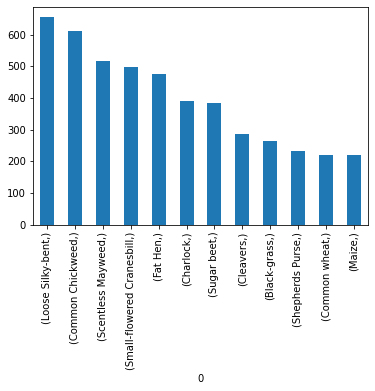

In [12]:
trainLabel.value_counts().plot(kind='bar')

In [13]:
print(f"Training image array shape:{trainImg.shape}")
print(f"Training target labels:{trainLabel.shape}")

Training image array shape:(4750, 128, 128, 3)
Training target labels:(4750, 1)


C. Write a function that will select n random images and display images along with its species. 

In [14]:
def image_display(i):
  img = trainImg[i]
  label = trainLabel[0][i]
  print(f'Image name:{label}')
  plt.imshow(img)


Image name:Cleavers


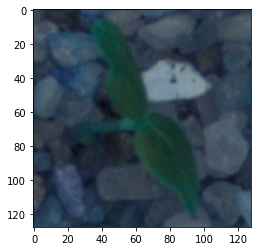

In [15]:
image_display(9)

Image name:Sugar beet


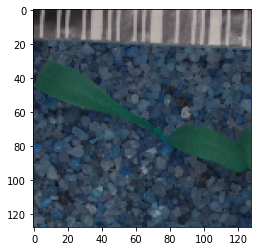

In [17]:
image_display(567)

2. Data preprocessing 

A. Create X & Y from the DataFrame.

Normalize the Data
The Data (Train image and testing image) needs to be normalized to 0-1 by diving the values by 255

A. Create X & Y from the DataFrame.

In [18]:
 X = np.asarray(trainImg)  # Train images set
 y = pd.DataFrame(trainLabel)

In [19]:
print("X Shape",X.shape)
print("Y Shape",y.shape)

X Shape (4750, 128, 128, 3)
Y Shape (4750, 1)


B. Encode labels of the images. 

In [21]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
encoder = LabelBinarizer()
y = encoder.fit_transform(y)




In [22]:
# Display target variable
y[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

C. Unify shape of all the images.

In [23]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(X)

D. Normalise all the images.

In [24]:
# Normalization of the Image Data
X = X.astype('float32') / 255

In [25]:
print(X.shape)

(4750, 128, 128, 3)


3. Model training 

A. Split the data into train and test data. 

In [26]:
# Step#1: Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [27]:
# Step#2: Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

B. Create new CNN architecture to train the model.

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                        

In [29]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/plantspecies_CNN_model1.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#Stop fitting if there's no enhancement of accuracy for 10 times.

C. Train the model on train data and validate on test data.

In [31]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=8), 
                    epochs=10, validation_data=(X_test, y_test),   
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


415/416 [============================>.] - ETA: 0s - loss: 2.8331 - accuracy: 0.2189
Epoch 1: val_accuracy improved from -inf to 0.20365, saving model to /content/drive/My Drive/plantspecies_CNN_model1.h5
416/416 [==============================] - 26s 34ms/step - loss: 2.8332 - accuracy: 0.2189 - val_loss: 4.4993 - val_accuracy: 0.2037
Epoch 2/10
416/416 [==============================] - ETA: 0s - loss: 2.0920 - accuracy: 0.3537
Epoch 2: val_accuracy improved from 0.20365 to 0.30618, saving model to /content/drive/My Drive/plantspecies_CNN_model1.h5
416/416 [==============================] - 13s 30ms/step - loss: 2.0920 - accuracy: 0.3537 - val_loss: 2.8590 - val_accuracy: 0.3062
Epoch 3/10
416/416 [==============================] - ETA: 0s - loss: 1.7915 - accuracy: 0.4174
Epoch 3: val_accuracy did not improve from 0.30618
416/416 [==============================] - 12s 30ms/step - loss: 1.7915 - accuracy: 0.4174 - val_loss: 2.6164 - val_accuracy: 0.2584
Epoch 4/10
416/416 [==========

In [32]:
#Final score and accuracy of the model
score, acc = model.evaluate(X_test,y_test)
#score1, acc1 = model.evaluate(X_train,y_train)
print('Validation score:', score,'   Validation accuracy:', acc)
#print('Train score:', score1,'   Train accuracy:',acc1)

23/23 [==============================] - 0s 9ms/step - loss: 1.4248 - accuracy: 0.5295
Validation score: 1.4248303174972534    Validation accuracy: 0.5294944047927856


In [33]:
predictions = model.predict(X_test)

23/23 [==============================] - 0s 7ms/step


D. Select a random image and print actual label and predicted label for the same.

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(12))
  plt.yticks([])
  thisplot = plt.bar(range(12), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [35]:
predictions[0]

array([1.9966960e-01, 2.2574426e-05, 2.0021855e-05, 2.5072723e-04,
       4.0195249e-02, 5.8313098e-04, 7.5846589e-01, 3.8380054e-04,
       9.6799289e-05, 2.7734626e-05, 2.9822122e-05, 2.5462703e-04],
      dtype=float32)

In [36]:
np.argmax(predictions[0])

6

In [39]:
class_names = encoder.classes_

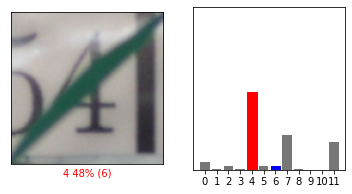

In [40]:
#Correct Prediction
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

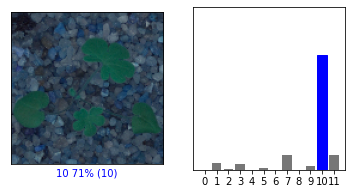

In [41]:
#Incorrect Prediction
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()